#Notebook Purpose
Examine the plankton dataset provided by [Prof Mark Ohman](https://mohman.scrippsprofiles.ucsd.edu/) and Dr. Jeff Ellen to the SIOC-209 Spring 2024 class "Deep Learning for Geo/Environmental sciences"

#Setup the Google Drive Permissions
Before executing the code below, I did the following:
In google drive, 'Shared with me', I located 'SIOC-209 Data' folder then click :


```
 '...'->Organize->Add Shortcut, chose 'Colab Notebooks'
```

Afer I did this, I then needed to accept the following dialog

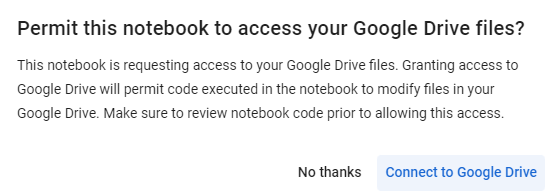

Then, after this, I had to accept another modal/popup dialog.

Once this is done, then the following code should work.

In [1]:
#Before executing the code below, I did the following:
#In google drive, 'Shared with me', I located 'SIOC-209 Data' folder
#  then click '...'->Organize->Add Shortcut, chose 'Colab Notebooks'

import os
from google.colab import drive

#On first execution, may encounter authentication modal/popup dialog
drive.mount('/content/drive', force_remount=True)

#The following line works because of the setup done at the top of the cell
directory_files = os.listdir('/content/drive/MyDrive/Colab Notebooks/SIOC-209 Data/plankton_data')
print(directory_files)

#this should print:
#['sioc_209_15k.zip', 'sioc_209_30k.zip', 'sioc_209_images', 'sioc_209_30k', 'sioc_209_15k']

Mounted at /content/drive
['sioc_209_15k.zip', 'sioc_209_30k.zip', 'sioc_209_images', 'individually_uploaded_sioc_209_15k', 'individually_uploaded_sioc_209_30k', 'sioc_209_15k', 'sioc_209_30k']


In [2]:
#Optional Step for unzipping the files, for example to your own directory
#This took approx 5-10 minutes to execute
import os
from google.colab import drive

!unzip -u "/content/drive/MyDrive/Colab Notebooks/SIOC-209 Data/plankton_data/sioc_209_15k.zip" -d "/content/drive/MyDrive/Colab Notebooks/"
!unzip -u "/content/drive/MyDrive/Colab Notebooks/SIOC-209 Data/plankton_data/sioc_209_30k.zip" -d "/content/drive/MyDrive/Colab Notebooks/"


Archive:  /content/drive/MyDrive/Colab Notebooks/SIOC-209 Data/plankton_data/sioc_209_15k.zip
Archive:  /content/drive/MyDrive/Colab Notebooks/SIOC-209 Data/plankton_data/sioc_209_30k.zip


In [ ]:
#Count the images provided in the dataset
import os, random
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
set_15k = '/content/drive/MyDrive/Colab Notebooks/SIOC-209 Data/plankton_data/sioc_209_15k'
set_30k = '/content/drive/MyDrive/Colab Notebooks/SIOC-209 Data/plankton_data/sioc_209_30k'

#For each dataset, count up the total number of categories and iamges
for d in [set_15k, set_30k]:
  all_cats = sorted(os.listdir(d))
  print(f'---Counting {d}')
  set_total = 0
  num_cats = 0
  paren_count = 0
  for cat in all_cats:
    cat_dir = os.path.join(d, cat)
    cat_count = len(os.listdir(cat_dir))
    num_cats += 1
    set_total += cat_count
    print(f'Category {cat} image count = {cat_count}')
  print(f'   === Datset total is {num_cats} categories and {set_total} images')


In [ ]:

#Explore the images in the dataset, create image strips

import os, random
from google.colab import drive
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

def get_image_height(img):
  """A helper function to sort images"""
  return img.height

def create_image_strips(src_dir, col_size=10):
  """
  This function creates strips of images in the plankton dataset.
  In my google colab, takes about

  Args:
      src_dir (str): The root directory of plankton images
      col_size (int): The number of example images to create

  Returns:
      none: In a python notebook, just displays the images

  """
  all_cls = sorted(os.listdir(src_dir))  #get all classes alphabetically

  #For each category (cat), select a random sample of all the images to display
  for cat in all_cls:
    cat_dir = os.path.join(src_dir, cat)
    all_roi = os.listdir(cat_dir)
    sel_roi = random.sample(all_roi, col_size)

    #Open all the images, sort them by height
    cat_imgs = [Image.open(os.path.join(cat_dir, sr)).convert("RGB") for sr in sel_roi]
    cat_imgs.sort(key=lambda path: get_image_height(path), reverse=False)

    #Calculate the size of the total image strip (cumulative width x max height)
    tot_width = 0
    max_height = 10
    for img in cat_imgs:
      tot_width+=img.width
      if img.height > max_height:
        max_height = img.height

    #Calcuate the size of a text label for the class, use it to create
    text_margin=5
    default_font = ImageFont.load_default()
    whole_image = Image.new("RGB", (1000, max_height))
    draw = ImageDraw.Draw(whole_image)  #this one will get discarded, used for bbox
    bbox = draw.textbbox((text_margin, text_margin), cat, font=default_font)
    left, top, right, bottom = bbox
    text_width = right-left
    text_height = bottom-top #in python image coordinates start at top left
    x_offset = text_margin + text_width + text_margin

    #create the Image Strip, add the text on the left, then add all images
    whole_image = Image.new("RGB", (tot_width+x_offset, max_height))
    draw = ImageDraw.Draw(whole_image)
    draw.text((text_margin, (max_height - text_height) // 2), cat, font=default_font, fill=(200,200,200))
    for img in cat_imgs:
      whole_image.paste(img, (x_offset, 0))
      x_offset+=img.width

    display(whole_image)
    #or save the image using something similar to:
    #whole_image.save(os.path.join(out_dir,f'{cat}.png'))

### Start of 'main' function
drive.mount('/content/drive', force_remount=True)   #Make files accessible
random.seed(42)  # Set a fixed seed for reproducibility

#confirm this is correct using cell above
src_dir = '/content/drive/MyDrive/Colab Notebooks/SIOC-209 Data/plankton_data/sioc_209_15k'
create_image_strips(src_dir)